In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
planets = []
GM = 398600
def_size = plt.rcParams['lines.markersize'] ** 2
K_Earth = 1
R_Earth = 6371

In [3]:
#рисует центры масс
def draw_planets(ax):
    X = np.array(planets)
    ax.scatter(X[:,1], X[:,2], X[:,0] * def_size, color='black')
    #размер точки пропорцианален массе, где стандартный - масса земли 

In [4]:
def extract_data(file_name):
    global planets
    planets = []
    data_text = open(file_name, 'r')
    data_list = []
    line = data_text.readline()
    line_data = list(map(int, line.split()))
    number_of_planets = line_data[0]
    for i in range(0, number_of_planets):
        line = data_text.readline()
        line_data = list(map(float, line.split()))
        planets.append(line_data)
    line = data_text.readline()
    line_data = list(map(int, line.split()))
    number_of_ways = line_data[0]
    seconds = line_data[1]
    for i in range(0, number_of_ways):
        way = []
        for j in range(0, seconds + 1):
            line = data_text.readline()
            line_data = list(map(float, line.split()))
            way.append(line_data)
        data_list.append(np.array(way))
    return data_list        

In [5]:
def add_arrow(line, direction='right', number=2, size=15, color=None):
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()
    
    if (number == 2):
        positions = [xdata[round(len(xdata) / 3)], xdata[round(2 * len(xdata) / 3)]]
    else:
        positions = [xdata.mean()]
    
   
    for pos in positions:
        start_ind = np.argmin(np.absolute(xdata - pos))
        if direction == 'right':
            end_ind = start_ind + 1
        else:
            end_ind = start_ind - 1

        line.axes.annotate('',
            xytext=(xdata[start_ind], ydata[start_ind]),
            xy=(xdata[end_ind], ydata[end_ind]),
            arrowprops=dict(color=color, headwidth = 8, headlength = 8),
            size=size
        )

In [6]:
def task_a(ax):
    X = extract_data('/home/viacheslav/progs/task_a.txt')
    draw_planets(ax)
    ax.arrow(0, R_Earth, R_Earth, 0, head_width=500, head_length=500, length_includes_head = True)
    ax.annotate(r'$v_0$', (R_Earth / 2, R_Earth + 400))
    v = [5, 9, 12]
    for i in range(0, 3):
        line = ax.plot(X[i][:,0], X[i][:,1], linewidth = 0.8, label=r'$v_0=$' + str(int(v[i])) + ' km/s')[0]
        add_arrow(line)
    ax.set_title('Пункт a')
    ax.legend()

In [8]:
def task_b(ax):
    X = extract_data('/home/viacheslav/progs/task_b.txt')
    draw_planets(ax)
    ax.arrow(0, R_Earth, R_Earth / 2, 0, head_width=100, head_length=100, length_includes_head = True)
    line = ax.plot(X[0][:,0], X[0][:,1], linewidth = 0.8, label=r'$v_0=$ 7.9098 km/s')[0]
    ax.annotate(r'$v_0$', (R_Earth / 3, R_Earth + 200))
    add_arrow(line)
    ax.set_title('Пункт b')
    ax.legend(loc=2)

In [9]:
def task_c(ax1, ax2):
    X = extract_data('/home/viacheslav/progs/task_c.txt')
    draw_planets(ax1)
    ax1.axis([-30000, 30000, -30000, 30000])
    ax1.grid()
    ax1.arrow(0, 0, 5000, 5000, head_width=500, head_length=500, length_includes_head = True)
    ax1.annotate(r'$v_0$', (2000, 4000))
    for i in range(0, 9, 2):
        v = 1 + i * 0.5
        line = ax1.plot(X[i][:,0], X[i][:,1], linewidth = 0.8, label=r'$v_0=$' + str(v) + ' km/s')[0]
        if (i != 0):
            add_arrow(line)
    ax1.legend()
    ax1.set_title('Пункт с часть 1')
    
    draw_planets(ax2)
    ax2.axis([-30000, 30000, -30000, 30000])
    ax2.grid()
    plt.arrow(0, 0, 5000, 5000, head_width=500, head_length=500, length_includes_head = True)
    for i in range(1, 9, 2):
        v = 1 + i * 0.5
        line = ax2.plot(X[i][:,0], X[i][:,1], linewidth = 0.8, label=r'$v_0=$' + str(v) + ' km/s')[0]
        add_arrow(line);
    ax2.annotate(r'$v_0$', (2000, 4000))
    ax2.set_title('Пункт с часть 2')
    ax2.legend()

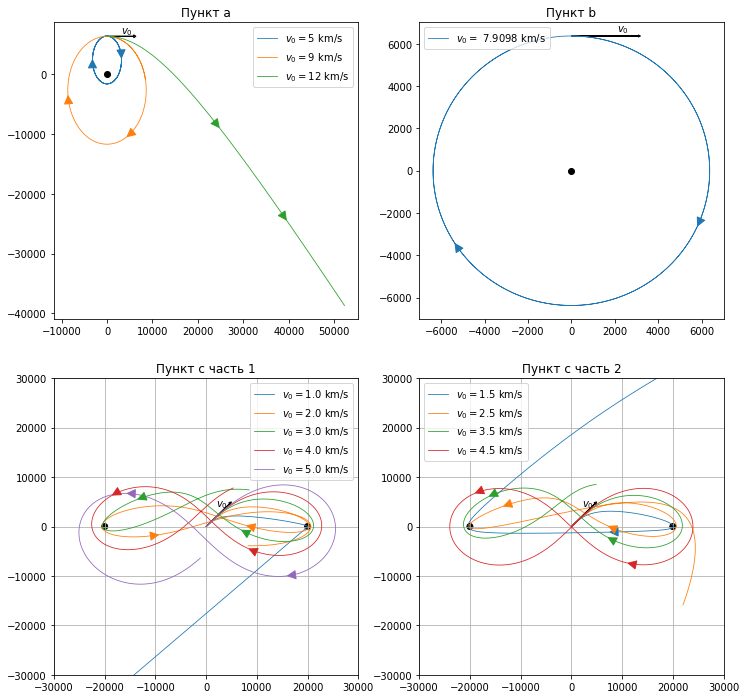

In [11]:
fig = plt.figure(figsize=(12, 12))
ax1 = plt.subplot(2, 2, 1);
ax2 = plt.subplot(2, 2, 2);
ax3 = plt.subplot(2, 2, 3);
ax4 = plt.subplot(2, 2, 4);
task_a(ax1)
task_b(ax2)
task_c(ax3, ax4)
plt.savefig("/home/viacheslav/Tex/Settelite.jpg", quality=95)